In [1]:
import numpy as np
np.random.seed(123)  # for reproducibility

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# Preprocess input data
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


In [5]:
# Preprocess class labels
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [6]:
# Define model architecture
model = Sequential()

model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(1,28,28), data_format='channels_first'))
model.add(Convolution2D(32, (3, 3), activation='relu', data_format='channels_first'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [7]:
 
# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
# Fit model on training data
model.fit(X_train, Y_train, 
          batch_size=32, nb_epoch=10, verbose=1)
 
# Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=0)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 150s 3ms/step - loss: 0.2196 - acc: 0.9331
Epoch 2/10
60000/60000 [==============================] - 151s 3ms/step - loss: 0.0939 - acc: 0.9715
Epoch 3/10
60000/60000 [==============================] - 155s 3ms/step - loss: 0.0741 - acc: 0.9774
Epoch 4/10
60000/60000 [==============================] - 185s 3ms/step - loss: 0.0580 - acc: 0.9823
Epoch 5/10
60000/60000 [==============================] - 179s 3ms/step - loss: 0.0503 - acc: 0.9844
Epoch 6/10
60000/60000 [==============================] - 162s 3ms/step - loss: 0.0442 - acc: 0.9862
Epoch 7/10
60000/60000 [==============================] - 156s 3ms/step - loss: 0.0404 - acc: 0.9875
Epoch 8/10
60000/60000 [==============================] - 156s 3ms/step - loss: 0.0342 - acc: 0.9891
Epoch 9/10
60000/60000 [==============================] - 161s 3ms/step - loss: 0.0336 - acc: 0.9893
Epoch 10/10
60000/60000 [==============================] - 185s 3ms/step - loss: 0.0295 - a

In [43]:
X_test[1]

array([[[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.  

In [41]:
import matplotlib.pyplot as plt

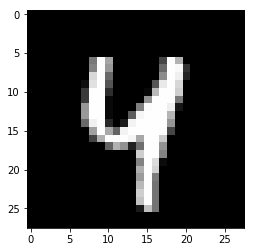

In [53]:
first_image = X_test[42]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [54]:
model.predict_classes(np.array([X_test[42]]))

array([4], dtype=int64)

In [52]:
model.save(filepath="mnist.model")